# Data Model

In [3]:
import sys
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# for one hot encoding with sklearn
from sklearn.preprocessing import OneHotEncoder
# for one hot encoding with feature-engine
from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
sys.modules['sklearn.externals.joblib'] = joblib
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [ ]:
! pip install feature_engine

In [ ]:
! pip install mlxtend

In [4]:
df=pd.read_csv("/content/car.csv")

In [ ]:
# Check NULL Values-No NULL Values
df.isnull().mean()

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

In [23]:
X_train_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 222 to 172
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Present_Price        210 non-null    float64
 1   Kms_Driven           210 non-null    int64  
 2   Owner                210 non-null    int64  
 3   current_year         210 non-null    int64  
 4   no_years             210 non-null    int64  
 5   Fuel_Type_Diesel     210 non-null    int64  
 6   Fuel_Type_Petrol     210 non-null    int64  
 7   Seller_Type_Dealer   210 non-null    int64  
 8   Transmission_Manual  210 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 16.4 KB


In [30]:
X_test_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 223 to 135
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Present_Price        91 non-null     float64
 1   Kms_Driven           91 non-null     int64  
 2   Owner                91 non-null     int64  
 3   current_year         91 non-null     int64  
 4   no_years             91 non-null     int64  
 5   Fuel_Type_Diesel     91 non-null     int64  
 6   Fuel_Type_Petrol     91 non-null     int64  
 7   Seller_Type_Dealer   91 non-null     int64  
 8   Transmission_Manual  91 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 7.1 KB


In [8]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [ ]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [5]:
df['Owner'].unique()

array([0, 1, 3])

In [22]:
X_train_t.describe()

,Present_Price,Kms_Driven,Owner,current_year,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Transmission_Manual
count,210.000000,210.000000,210.000000,210.0,210.000000,210.000000,210.000000,210.000000,210.000000
mean,7.620824,38127.809524,0.038095,2020.0,6.457143,0.185714,0.804762,0.633333,0.876190
std,9.187671,42141.894392,0.255983,0.0,2.944555,0.389805,0.397331,0.483046,0.330151
min,0.320000,500.000000,0.000000,2020.0,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.990000,15036.000000,0.000000,2020.0,4.000000,0.000000,1.000000,0.000000,1.000000
50%,6.015000,34000.000000,0.000000,2020.0,6.000000,0.000000,1.000000,1.000000,1.000000
75%,9.900000,49000.000000,0.000000,2020.0,8.000000,0.000000,1.000000,1.000000,1.000000
max,92.600000,500000.000000,3.000000,2020.0,17.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.drop('Car_Name',axis=1,inplace=True)

In [ ]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'current_year', 'no_years'],
      dtype='object')

In [9]:
df['current_year']=2020

In [10]:
df['no_years']=df['current_year']-df['Year']

In [9]:
df.drop('Fuel_Type_Petrol',axis=1,inplace=True)

In [11]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'current_year', 'no_years'],
      dtype='object')

# Split the Dataset into Train and Test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['Present_Price', 'Kms_Driven', 'Fuel_Type','Seller_Type', 'Transmission', 'Owner', 'current_year', 'no_years']],  # predictors
    df['Selling_Price'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0) 

In [27]:
X_train.shape,X_test.shape

((210, 8), (91, 8))

# Encode Categorical Variables

In [13]:
ohe_enc = fe_OneHotEncoder(
    top_categories=None,
    variables=['Fuel_Type', 'Seller_Type','Transmission'],  # we can select which variables to encode
    drop_last=True)
#ohe_enc.fit(X_train.fillna('Missing'))


In [18]:
X_train_t['Fuel_Type_Petrol'].value_counts()

1    169
0     41
Name: Fuel_Type_Petrol, dtype: int64

In [21]:
X_test_t['Fuel_Type_Petrol']=0

In [27]:
X_test_t.drop('Fuel_Type_Petrol',axis=1,inplace=True)

In [29]:
X_test_t.insert(6, 'Fuel_Type_Petrol', 0)

In [14]:
X_train_t = ohe_enc.fit_transform(X_train.fillna('Missing'))
X_test_t = ohe_enc.fit_transform(X_test.fillna('Missing'))

In [13]:
X_train_t.columns

Index(['Present_Price', 'Kms_Driven', 'Owner', 'current_year', 'no_years',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Dealer',
       'Transmission_Manual'],
      dtype='object')

In [22]:
X_test_t.columns

Index(['Present_Price', 'Kms_Driven', 'Owner', 'current_year', 'no_years',
       'Fuel_Type_Diesel', 'Seller_Type_Dealer', 'Transmission_Manual',
       'Fuel_Type_Petrol'],
      dtype='object')

# Feature Selection

In [33]:
efs = EFS(RandomForestRegressor(n_estimators=5,
                                n_jobs=4,
                                random_state=0,
                                max_depth=2),
          min_features=1,
          max_features=6,
          scoring='r2',
          print_progress=True,
          cv=2)

efs = efs.fit(X_train_t, y_train)

Features: 465/465

In [ ]:
X_train.columns

Index(['Present_Price', 'Kms_Driven', 'Owner', 'current_year', 'no_years',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Dealer',
       'Transmission_Manual'],
      dtype='object')

In [16]:
X_train_t.columns[list(efs.best_idx_)]


Index(['Present_Price', 'Kms_Driven', 'Owner', 'Seller_Type_Dealer'], dtype='object')

In [17]:
X_test_t.columns[list(efs.best_idx_)]


Index(['Present_Price', 'Kms_Driven', 'Owner', 'Transmission_Manual'], dtype='object')

# Compare performance of feature subsets

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train_t,y_train)

ExtraTreesRegressor()

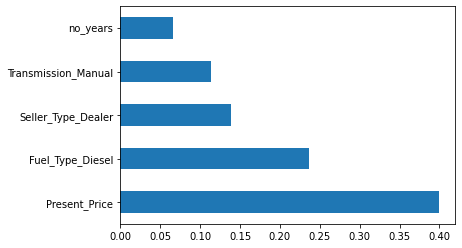

In [26]:
feat_importances = pd.Series(model.feature_importances_, index=X_train_t.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()